# Employee Attrition Lab (Can Carter Beat AutoAI?)

This is a lab designed to dig into the guts of what is actually happening in the watson assistant employee attrition lab

### Import Libraries
First we have to import some libraries to make working with the dataset a little easier. Numpy and pandas are two renound python libraries that make it very easy to work with large data science datasets

In [1]:
import numpy as np
import pandas as pd

Lets read in the dataset and see what it looks like

In [2]:
data = pd.read_csv("Employee-Attrition.xlsx_shaped.csv")
display(data)
display(data.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Take a second and scroll trough the data and take a look at what you see. We also have all of the columns printed out below the data

### Data Seperation
Now we need to seperate our data into features (data_x) and our training parameter (data_y). In this case out training parameter is the Attrition columns. We also need to convert this value from a string "Yes" or "No" into a number 1 or 0. This isnt necesarry to train a model but it will become clear later why we are doing this. 

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

In [4]:
data_x = data.drop(columns=["Attrition"])
data_y = data.loc[:, "Attrition"]

data_y = LabelEncoder().fit_transform(data_y)

In [5]:
# ohe = data_x.loc[:, ["BusinessTravel",'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]

enc = OneHotEncoder(sparse=False)
data_x = enc.fit_transform(data_x)

# data_x = data_x.drop(columns=["BusinessTravel",'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])
data_x = normalize(data_x, axis=1)

# data_x = pd.concat((pd.DataFrame(data_x), pd.DataFrame(test)), axis =1)

In [7]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
# model = RandomForestClassifier(n_estimators=100)

In [8]:
#Silence future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
cv = cross_validate(model, data_x, data_y, cv=4)

for i in cv["test_score"]:
    print("Test Score: " + str(i))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.80)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("ROC AUC Score: " + str(roc_auc_score(y_test, y_pred)))
print("Accurace Score: " + str(accuracy_score(y_test, y_pred)))

ROC AUC Score: 0.5869565217391304
Accurace Score: 0.8707482993197279


In [10]:
import matplotlib.pyplot as plt

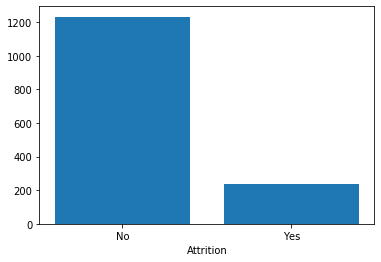

In [11]:
yn = np.bincount(data_y)

plt.bar([0, 1], yn)
plt.xlabel("Attrition")
plt.xticks([0,1], labels=["No", "Yes"])

plt.show()

In [12]:
from sklearn.utils import resample

In [13]:
mask = data_y == 1

yes = data_x[mask]
no = data_x[np.invert(mask)]

In [15]:
no = resample(no, n_samples=yes.shape[0])
print(len(yes))
print(len(no))

237
237


In [16]:
data_x = np.vstack((yes, no))
data_y = np.hstack((np.repeat(1, len(yes)), np.repeat(0, len(no))))

print(data_x.shape)
print(data_y.shape)

(474, 4031)
(474,)


In [18]:
cv = cross_validate(model, data_x, data_y, cv=4)

for i in cv["test_score"]:
    print("Test Score: " + str(i))

Test Score: 0.7833333333333333
Test Score: 0.7711864406779662
Test Score: 0.7372881355932204
Test Score: 0.7288135593220338


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.80)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("ROC AUC Score: " + str(roc_auc_score(y_test, y_pred)))
print("Accurace Score: " + str(accuracy_score(y_test, y_pred)))

ROC AUC Score: 0.734180035650624
Accurace Score: 0.7263157894736842
